In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from __future__ import division
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

# Background information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Q1: What is our independent variable? What is our dependent variable?

The independent variable is whether the word name and color are the same or different. Level of measurement is word-color match, or word-color mismatch. Time it takes going through a list of words is dependent on word-color matching or not. <b>(Ref. /1/)</b>

## Q2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- An appropriate hypothesis for this task is that there is no difference in response time between the two type of word-color lists. 
- A way of testing this is to create multiple, equally long lists of words which are:
    - Case a): word-color match (congruent); you have to answer the color which is written.
    - Case b): word-color mismatch (incongruent); one has to answer the color of the letters, not the written word itself.

Then collect the time used going through these lists.

### Appropriate hypothesis:
$T_a$: Average time to go through case a lists. $T_b$: Average time to go through case b lists.

- $H_0: T_a - T_b \geq 0$
- $H_a: T_a - T_b < 0 $

I would perform a one-tailed test with a-level of 0.05 to conclude that it is statistically significant that $T_a$ is less than $T_b$. Choosing a smaller a-level of 0.01 or 0.001 may also be adequate. However, the test is not that crucial and the already performed experiments show that $T_a$ is smaller than $T_b$.




# Stroop experiment results

## Q3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
# Load the Stroop csv file
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# Show some stats about the results
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Central tendency measures:
From the table above, we see that the <b>mean values for congruent and incongruent are 14.05 [s] and 22.02 [s]</b>, respectively. The difference in mean is roughly 8 [s], which is quite significant. We would need to perform a t-test to confirm that the difference is not by chance. Also, we see that for both conditions, the mean and median are near each other. The median values are listed in the 50% row above.

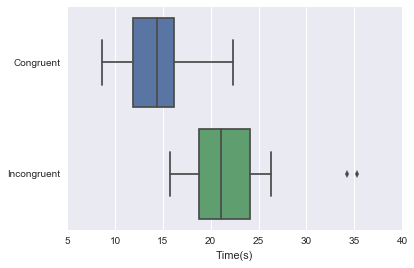

In [4]:
ax = sns.boxplot(data=df, orient="horizontal")
ax.set_xlabel("Time(s)")

### Variability 
From the describe-table and the box plots, it is demonstrated that variability is greater for the incongruent case. The standard deviations are:

- congruent: 3.6 [s]
- incongruent: 	4.8 [s]

The greater variability for the incongruent case is further illustrated by the outliers in the box plot. This may indicate that there are larger differences in evaluating colors in the population, than reading text. 

## Q4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

However, from the histogram plot below, it seems that the data is "tighter" for the incongruent case, if we neglect the outliers. This is also seen by the box plot above. The box plot itself is broader for the congruent case. The outliers are easily seen as "alone" in the upper part of the incongruent case.

The histogram for the congruent case looks like a slightly right skewed normal distribution. The incongruent is quite uniform on the left part, then has a high peak, and then drops significantly. The outliers introduce another peak right in the distribution. However, the look of the distribution changes dramatically when the bin number is altered. 

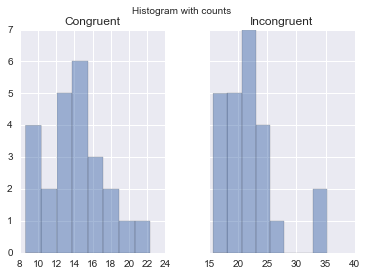

In [5]:
fig = plt.figure()
pd.DataFrame.hist(df, alpha=0.5, bins=8, sharey=True)
plt.suptitle("Histogram with counts")

We can also create plots of histograms together with a fitted distribution:

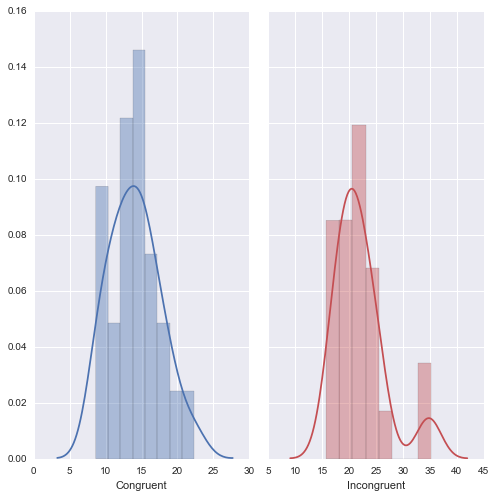

In [6]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7), sharex=False, sharey=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df["Congruent"], bins=8, ax=ax1)
                
# Plot a simple histogram with binsize determined automatically
sns.distplot(df["Incongruent"], bins=8, color="r", ax=ax2)

plt.tight_layout()

# This way of plotting was found at ref. /3/.

We see from the two distribution plots above, and the fitted kernel density estimation, that the congruent is a bit right-skewed normal distribution. The incongruent case indicates a multi-modal distribution, due to the outliers. 

## Q5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### Means, stds and ratio:

In [7]:
df_con = df["Congruent"]
df_incon = df["Incongruent"]

# Mean values
mu_con, mu_incon = df_con.mean(), df_incon.mean()
# Standard deviations
s_con, s_incon = df_con.std(), df_incon.std()

print mu_con, mu_incon
print s_con, s_incon

# Ratio between the std 
print "Ratio stds: %g " % (s_incon/s_con)

14.051125 22.0159166667
3.55935795765 4.79705712247
Ratio stds: 1.34773 


From <b>ref. /2/</b>, it is said that we can use pooled variance: <u>"If the two standard deviations are similar (neither is more than twice of the other), then the pooled standard error is used"</u>. <b>We have a ratio of ~1.35</b>, meaning that we can calculate the pooled standard error.

Pooled std. is found by equation:

$$sp = \sqrt{\frac{SS_1 + SS_2}{df_1 + df_2}}$$

### Pooled standard deviation

In [8]:
# Pooled standard error calculation
SS_con = sum([(x - mu_con)**2 for x in df_con])
SS_incon = sum([(x - mu_incon)**2 for x in df_incon])
# Degrees of freedom. OBS do not use dataframe variable, df!
dof_con = df_con.count() - 1
dof_incon = df_incon.count() - 1

sp = np.sqrt((SS_con + SS_incon) / (dof_con + dof_incon))
print sp

4.22378894518


### Testing the hypothesis
We will now perform the hypothesis test, which was assigned in Q2 above.


$$H_0: \mu_{con} - \mu_{incon} \geq 0$$
$$H_a: \mu_{con} - \mu_{incon} < 0 $$

$\alpha$-level of 0.05. Based on the alternative hypo. the test is left-tailed. 

In [9]:
# Critical t-stat
alpha = 0.05
dof = dof_incon + dof_con
t_crit = -stats.t.ppf(1 - alpha, dof)
print "Critical t-stat: %g" % t_crit

# Standard error
SE = np.sqrt((sp**2)/df_con.count() + (sp**2)/df_incon.count())
# Calculate the sample t-stat
t_stat = (mu_con - mu_incon) / SE
print "Sample t-stat: %g" % t_stat

Critical t-stat: -1.67866
Sample t-stat: -6.53225


We see that the calculated t-stat significantly smaller than t-crit, which means that we can reject null hypo. with a $p \leq 0.05$. 

### Confidece interval
A 95% confidence interval between the mean difference will be constructed. Since the incongruent average time is greatest, the difference evaluated will be: $\mu_d = \mu_{incon} - \mu_{con}$. We used a directional t-test previously, so we need to calculate a new, two-tailed t-crit for the confidence interval.

We will use the pooled standard error $S_{\bar{x}-\bar{y}}$ to calculate the confidence interval:

$$\mu_d \pm t \cdot S_{\bar{x}-\bar{y}}$$

where,

$$S_{\bar{x}-\bar{y}} = \sqrt{\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2}}$$ 

In [10]:
# The difference 
mu_d = mu_incon - mu_con
# 95% confidence interval
alpha = 0.05
# Two tailed now
t_crit = stats.t.ppf(1 - alpha/2, dof)
print "T-crit: %g" % t_crit

# Calculate the confidence interval for the mean difference
conf_int = [(mu_d + (t_crit*SE) * n) for n in (-1, 1)]

print "mu_d: %g" % mu_d
print "CI: [%s]" % ", ".join([str(ci) for ci in conf_int])

T-crit: 2.0129
mu_d: 7.96479
CI: [5.51046234617, 10.4191209872]


We have now calculated a 95% CI for the mean difference. It is positive, between <b>5.5 - 10.2 [s]</b>. This also supports our hypothesis test, as the CI-values are above zero. This illustrates that people have more difficulties interpreting color, than words. 

### Comparing my results 
The results when I undertook the Stroop experiment are listed below. I tested both sets (#1 and #2) two times. One can see that the time was reduced for the second try. 

In [11]:
congruent = [15.639, 9.771]
incongruent = [23.596, 18.0]

mu_con, mu_incon = np.mean(congruent), np.mean(incongruent)
print mu_con, mu_incon, mu_incon-mu_con

12.705 20.798 8.093


Both average time values, $\mu_{con}$ and $mu_{incon}$, indicate that my results lie in the most probable area if we look at the plotted probability distributions above. Also, the my difference lies within the calculated confidence interval. 

### Conclusion
A statistical test was performed demonstrating human ability to process words and color. The processing was evaluated using equally long list of words with word-color match, and no word-color match. The time to go through the lists was used as input for the test. Our null hypothesis assumed no difference in the time going through the lists. An alternative hypothesis assumed that it takes longer time to go through the lists, where there is a word-color mismatch. 

The statistical test was performed using a one-tailed t-test and an $\alpha$-level of .05. The null hypothesis was rejected, showing that it is statistically significant with p-value $\leq$ .05, that it takes longer time to process color rather than letters.

The dataset results listed mean time of 14.05 [s] and 22.02 [s] for the congruent and incongruent lists, respectively. The mean difference is 7.96 [s], with a 95% confidence interval of [5.51, 10.42]. This interval further implies that it takes longer time to process color over words, as it is above zero.

# References

1. https://www.scribd.com/doc/111646449/Stroop-Effect
2. https://onlinecourses.science.psu.edu/stat200/node/60
3. https://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html